<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='Figures/alinco.png' width="120"/>
<h1 style="color:#000047;">Tarea 3: Algoritmos de detección de Outliers Multivariados</h1>
<br style="clear:both"/>
</div>


<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Investigar y entender algunos de los algoritmos que se usan para detección de outliers.
</div>

<div style="border-left:6px solid #003366; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#003366; margin-top:0;">1. Local Outlier Factor (LOF) <span style='font-size:0.8em; color:#888;'>&#128200;</span></h3>
<p style="font-size:1.08em;">
El <b>Local Outlier Factor (LOF)</b> es un algoritmo no supervisado que detecta anomalías comparando la densidad local de cada punto con la de sus vecinos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.
</p>
<ul style="font-size:1.05em;">
<li>Consulta el artículo original: <a href="https://dl.acm.org/doi/pdf/10.1145/335191.335388" target="_blank">LOF paper</a></li>
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo LOF y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo LOF de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Presenta tus resultados con gráficos y tablas para facilitar la comparación.
</div>
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Leemos el dataset de Insurance.scv
df_insurance = pd.read_csv("Data/insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 0.2 Cargamos libreria creada y redireccionamos path
import sys
import os

# Agregamos esta isntrucción para posicionarnos en raiz padre y asi poder encontrar la clase.
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from LibreriaDatos.HyAIA import HyAIA as hia
from LibreriaDatos.HyAIA import Outliers as ol
from LibreriaDatos.HyAIA import LOF as lof

# La clase LOF es la clase creada con las formulas matémáticas y programación python puro. Y se tienen los métodos para encontrar los outliers.
# También se creo la clase Outliers en la cual se implementaron métodos para LOF y DBSCAN con librerías, para tenerlas consolidadad en la misma clase de Analisis de Datos.


In [4]:
# Instanciamos la clase Outliers porque la usaremos más adelante para la comparación. 
cOutliers = ol(df_insurance)
cOutliers.data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Para el analisis usaremos las columnas age y bmi del dataset de Insurance.csv
analisis = cOutliers.data[['age','bmi']]
analisis

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [7]:
# Ahora creamos una uinstancia de nuestra clase creada con formulas en python. para calcular LOF
# Al instanciarla ya estamos realizando los calculos de LOF
# Obtenemos los datos en X y también identificamos los outliers para graficarlos. 

claseLof = lof(analisis, k=50)
X = claseLof.X
outliers = claseLof.Identificar_Outliers(threshold=1.2)

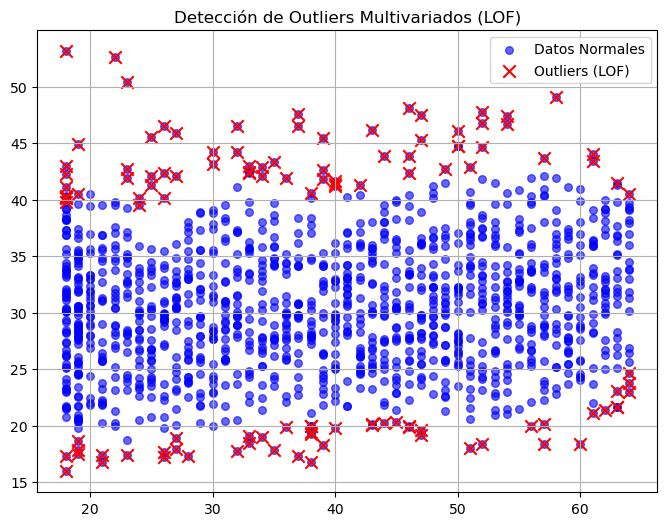

In [9]:
# Ahora graficamos con el método Graficar_LOF de nuestra clase. Donde le pasamos los outlies que identificamos.
# El resto de los demás datos se toman de la clase.

claseLof.Graficar_LOF(outliers)

In [10]:
# Ahora vamos a realizar la comparación con la clase creada con las librerias de "Sklearn"

In [11]:
# Como anteriormente ya habiamos instanciado la clase para obtener los datos. Ahora ya sólo mandamos llamar los métodos.
# Mandamos llamar el método LOF para detectar outliers multivariados y le pasamos como parametros: el numero de vecinos con los cuales comparará, 
# se le pasa tambien la contaminación y las columnas o características a analizar.

# Las columnas que estamos analizando son 'age' y 'bmi'
cOutliers.LOF(neighbors=50, contamina = 0.1, cols = analisis.columns)

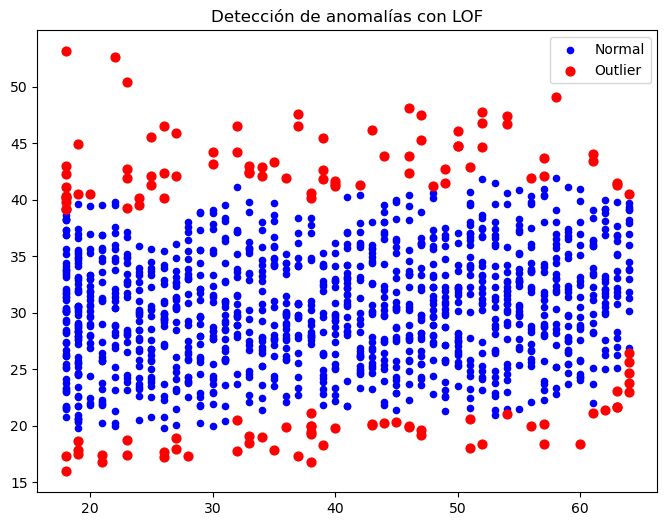

In [12]:
# Invocamos el m{etodo LOF_Plot para graficar los resultados
cOutliers.LOF_Plot()

In [15]:
# CONCLUSION:  Podemos identificar que en ambos algoritmos el resultado es muy parecido aunque los métodos sean diferentes el resultado se mantiene.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

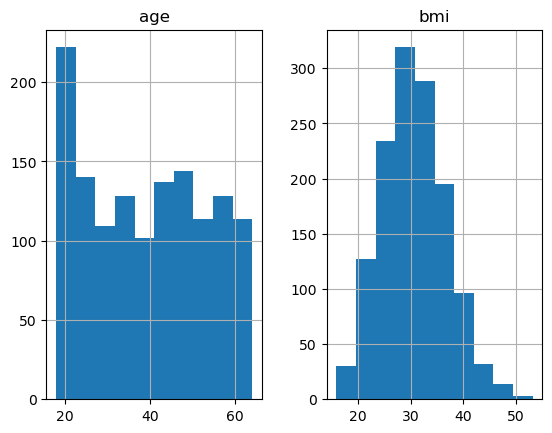

In [16]:
# Además analizamos el hostograma de estas columnas y las diagramas de caja.

analisis.hist()

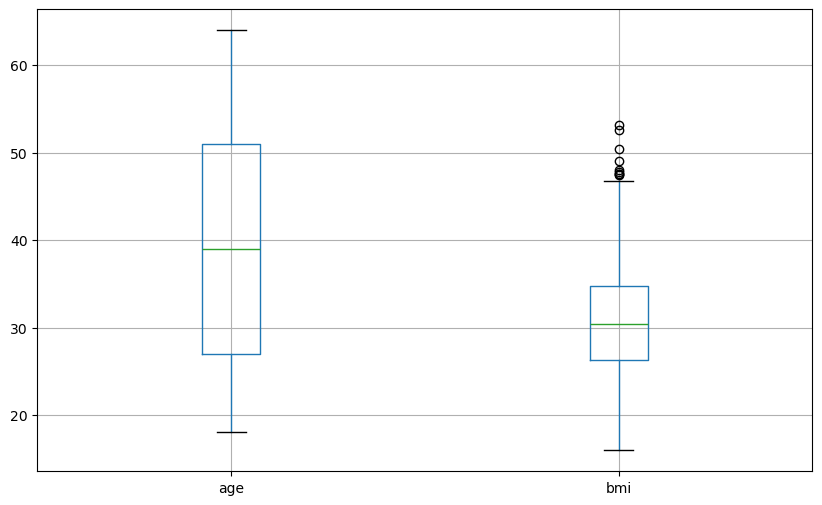

In [17]:
# En el diagrama de cajas en la siguiente figura podemos identificar que en "bmi" tenemos varios outliers.
# Sólo en este diagrama se pueden identificar ya que en el LOF no porque es multivariado.

analisis.boxplot(figsize=(10,6));

<div style="border-left:6px solid #b36b00; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#b36b00; margin-top:0;">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <span style='font-size:0.8em; color:#888;'>&#128201;</span></h3>
<p style="font-size:1.08em;">
<b>DBSCAN</b> es un algoritmo de clustering basado en densidad que agrupa puntos cercanos y considera como outliers (ruido) aquellos que no pertenecen a ningún grupo. A diferencia de K-means, no requiere especificar el número de clusters previamente.
</p>
<ul style="font-size:1.05em;">
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo DBSCAN y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo DBSCAN de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#fffbe6; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Explica brevemente las diferencias entre los resultados obtenidos por tu clase y los de <code>sklearn</code>.
</div>
</div>

In [18]:
# Ahora vamos a analizar los datos con el método DBSCAN que también esta en la clase Outliers que instanciamos anteriormente en este docuemtno.
# Por lo que ya no es necesario volver a instanciar.

In [19]:
# Sólo verificamos que traigamos los datos a analizar.  Primero visualizamos los datos completos desde la clase.
cOutliers.data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
# Ahora visualizamos los datos a analizar.
analisis

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [29]:
# Mandamos llamar el método DBSCAN para detectar outliers multivariados y le pasamos como parametros: el eps, no_samples 
# y las columnas o características a analizar.

cOutliers.DBSCAN(eps=2.5, samples = 10, cols = analisis.columns)

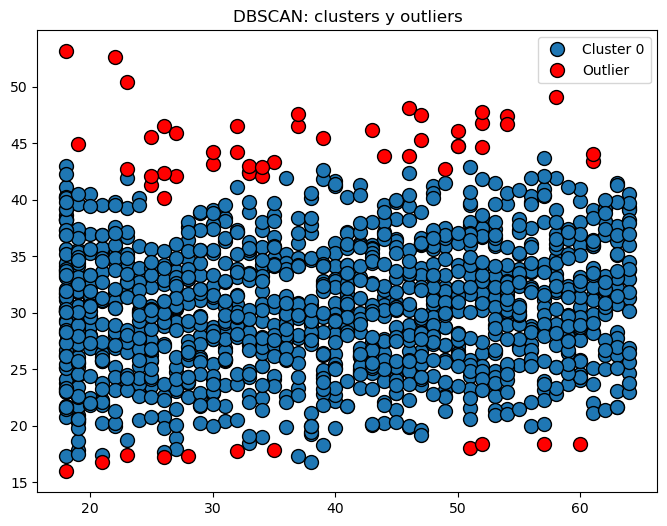

In [30]:
# Invocamos el método LOF_Plot para graficar los resultados
cOutliers.DBSCAN_Plot()

In [31]:
# CONCLUSION: A lo que podemos concluir es que todos los métodos son confiables y depende es que quieramos utilizar.  
# En este ultimo no es necesario espacificar el número de clusters ya que el método los detecta de manera automática.